Задание 1. EDA
Проведите разведывательный анализ данных (EDA).

Задание 2. Корреляционный анализ
Рассчитайте коэффициент корреляции Пирсона.
Постройте модель линейной регрессии.
Рассчитайте точность модели на тестовой выборке.

Задание 3. Классификация
Определите две самые популярные категории канала и отфильтруйте по ним набор данных.Постройте модель логистической регрессии.
Рассчитайте точность модели на тестовой выборке.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1. EDA**

In [ ]:
youtube = pd.read_csv('Global_YouTube_Statistics.csv', encoding='latin-1')
youtube.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

***1. Какая самая популярная категория YouTube-каналов?***

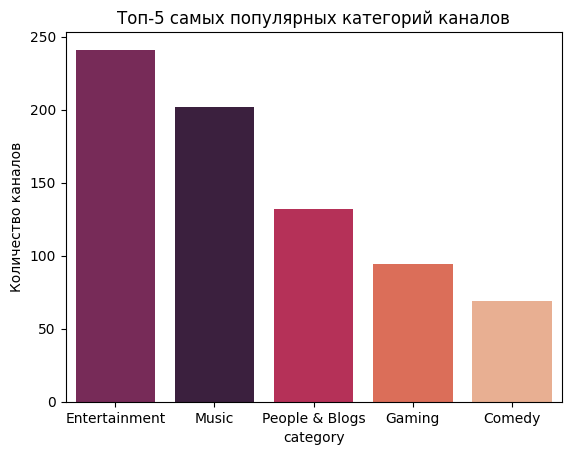

In [ ]:
top_cat = youtube['category'].value_counts().head(5).index.tolist()
top_youtube = youtube[youtube['category'].isin(top_cat)]
sns.countplot(data=top_youtube, x="category", hue="category", palette= "rocket", order=top_cat)
plt.title("Топ-5 самых популярных категорий каналов")
plt.ylabel("Количество каналов")
plt.show()

По графику можно сделать вывод о том, что самая популярная категория - развлечения

***2. Есть ли взаимосвязь между количеством подписчиков и общим числом просмотров на ютуб-каналах в Южной Корее?***

In [ ]:
sk = youtube[youtube['Country'] == 'South Korea']

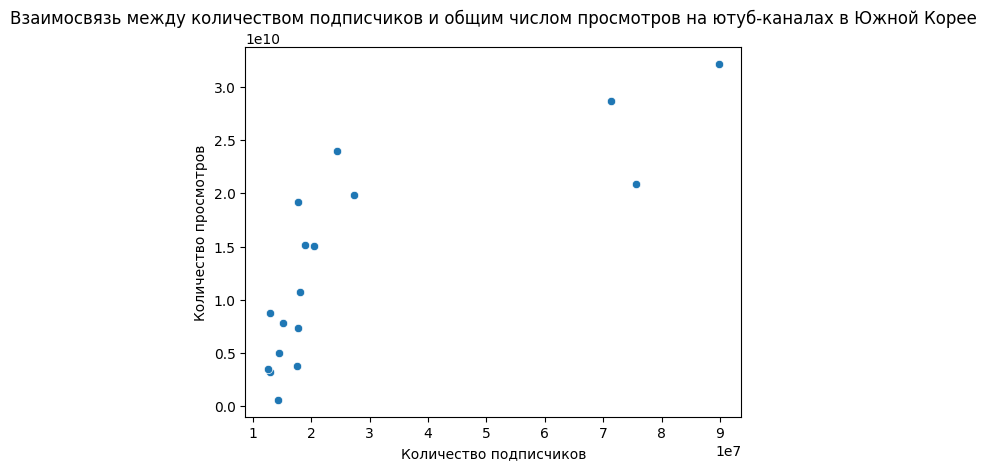

In [ ]:
sns.scatterplot(data=sk, x="subscribers", y="video views");

plt.title("Взаимосвязь между количеством подписчиков и общим числом просмотров на ютуб-каналах в Южной Корее")
plt.ylabel("Количество просмотров")
plt.xlabel("Количество подписчиков")
plt.show()

Из графика видно, что чем больше подписчиков, тем больше  число просмотров на ютуб-каналах Южной Кореи. Также присутствуют 3 канала, где в разы больше подписчиков и, следовательно, просмотров

***3. Влияет ли количество загруженных на канал видео на количество подписчиков?***

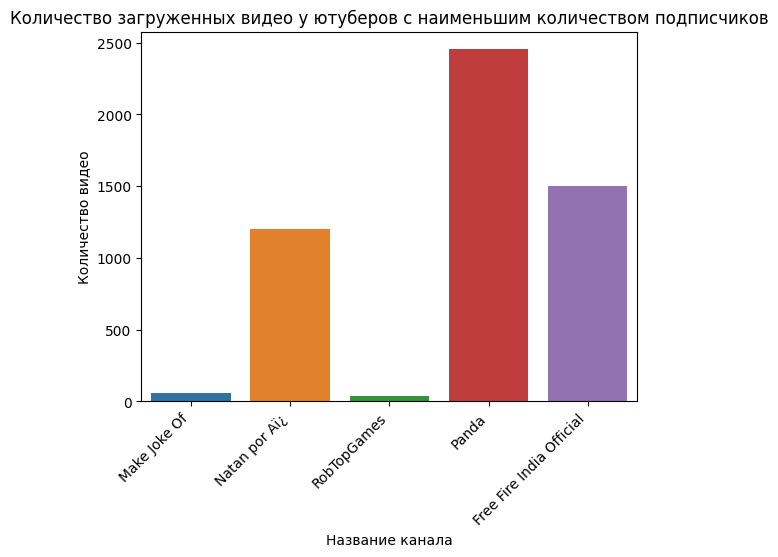

In [ ]:
sorted_youtuber = youtube.sort_values(by='subscribers', ascending=True).head(5)

sns.barplot(data=sorted_youtuber, x="Youtuber", y="uploads", hue = "Youtuber")
plt.title("Количество загруженных видео у ютуберов с наименьшим количеством подписчиков")
plt.ylabel("Количество видео")
plt.xlabel("Название канала")
plt.xticks(rotation=45, ha='right')
plt.show()


На графике представлена зависимость количества загруженных видео на канал у самых непопулярных (по количеству подписчиков) ютуберов. У отсортированных каналов одинаковое количество подписчиков (12 млн.). По диаграмме видно, что, в данном случае, бОльшее количество загруженных видео не влияет на общую популярность канала.

***4. У ютуберов из какой страны общее количество подписчиков наибольшее?***

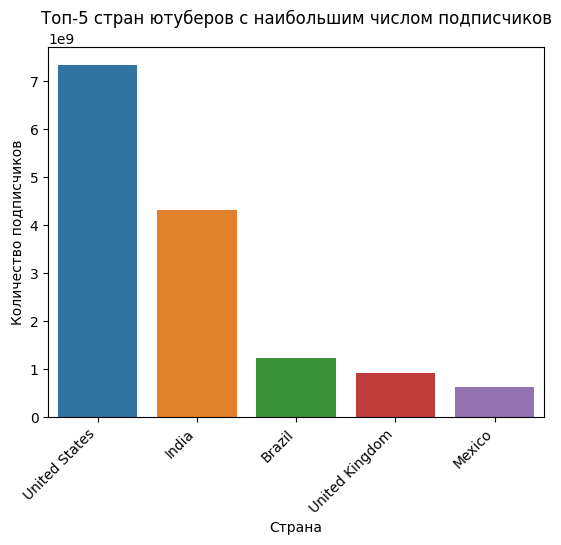

In [ ]:
sort_country = youtube.groupby('Country')['subscribers'].sum().reset_index().sort_values(by='subscribers', ascending=False).head(5)

sns.barplot(data=sort_country, x="Country", y="subscribers", hue = "Country")
plt.title("Топ-5 стран ютуберов с наибольшим числом подписчиков")
plt.ylabel("Количество подписчиков")
plt.xlabel("Страна")
plt.xticks(rotation=45, ha='right')
plt.show()

Получаем, что наибольшее общее число подписчиков у ютуберов из США.

***5. Есть ли линейная зависимость между количеством просмотров и доходом с канала за год?***

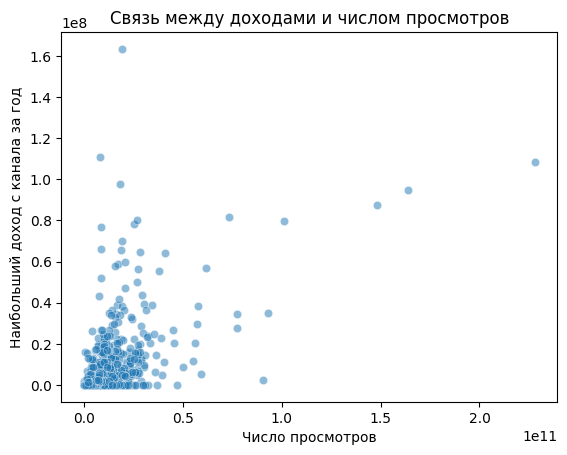

In [ ]:
sns.scatterplot(data=youtube, x="video views", y="highest_yearly_earnings", alpha=0.5)
plt.title("Связь между доходами и числом просмотров")
plt.ylabel("Наибольший доход с канала за год")
plt.xlabel("Число просмотров")
plt.show()

Прям явная зависимость не прослеживается, бОльшая часть данных сосредоточена у начала координат. Нет четкой линейной зависимости "с ростом просмотров увеличивается заработок". Возможно это связано с тем, что в разных странах выплаты от YouTube различаются, а также с тем, что в течение года, в зависимости от частоты загрузки видео и количества просмотров, заработок нестабилен.

***6. Влияет ли возраст канала на увеличение просмотров?***

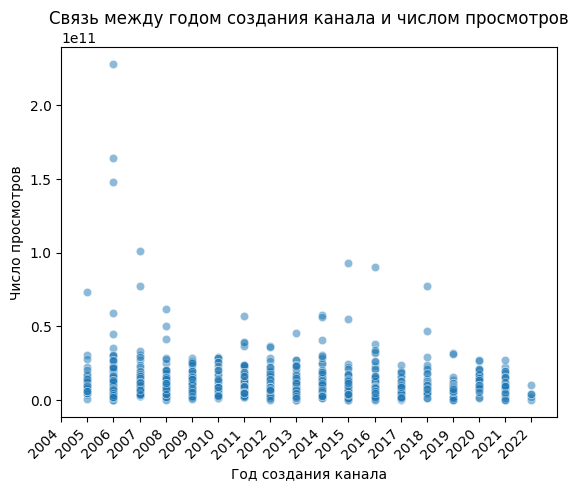

In [ ]:
sns.scatterplot(data=youtube, x="created_year", y="video views", alpha=0.5)
plt.xticks(range(1,2023), rotation=45, ha='right')
plt.xlim(2004, 2023)
plt.title("Связь между годом создания канала и числом просмотров")
plt.ylabel("Число просмотров")
plt.xlabel("Год создания канала")
plt.show()

По графику можно сказать, что возраст канала не влияет на количество просмотров, так как данные распределены по годам примерно одинаково, за исключением значительных выбросов 2006-2008 годов, что можно обосновать быстрорастущей популярностью самой площадки. Также есть отдельные каналы, которые "выстреливают" вне зависимости от года создания.

**Матрица корреляций**

In [ ]:
youtube_corr = youtube.drop(['Youtuber', 'category', 'Title', 'Country', 'Abbreviation', 'channel_type', 'created_month'], axis= 1 )


In [ ]:
youtube_corr.corr()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,1.000000,-0.640608,-0.453363,-0.051036,-0.059455,0.016776,-0.029554,-0.186339,-0.248394,-0.248050,...,-0.248392,-0.188571,0.106025,-0.006256,-0.037491,-0.025475,-0.014860,-0.038807,0.000036,0.019003
subscribers,-0.640608,1.000000,0.750958,0.077136,0.057202,0.032683,0.027393,0.278846,0.388941,0.388579,...,0.388935,0.309527,-0.141827,-0.011836,-0.006804,0.082219,-0.008251,0.083521,0.019450,0.022443
video views,-0.453363,0.750958,1.000000,0.165928,-0.061807,-0.068277,-0.050194,0.361856,0.552096,0.551455,...,0.552091,0.187384,-0.127068,-0.038180,-0.015232,0.080214,-0.000729,0.076649,0.037334,0.031268
uploads,-0.051036,0.077136,0.165928,1.000000,-0.108988,-0.078394,-0.098450,0.101521,0.166922,0.167283,...,0.166904,0.008933,-0.154904,0.034900,-0.218396,0.143122,-0.188101,0.072807,-0.067868,0.233169
video_views_rank,-0.059455,0.057202,-0.061807,-0.108988,1.000000,0.877504,0.949936,-0.067193,-0.208863,-0.208935,...,-0.208851,-0.167295,0.006671,0.031231,0.046934,-0.103178,-0.029276,-0.122747,0.015932,-0.016492
country_rank,0.016776,0.032683,-0.068277,-0.078394,0.877504,1.000000,0.898442,-0.098737,-0.148947,-0.148960,...,-0.148946,-0.126175,-0.037807,-0.012699,0.103290,-0.053181,0.066697,-0.024578,0.048323,-0.072476
channel_type_rank,-0.029554,0.027393,-0.050194,-0.098450,0.949936,0.898442,1.000000,-0.129051,-0.187908,-0.187970,...,-0.187896,-0.154021,-0.014002,0.038299,0.062484,-0.116254,0.003697,-0.123852,0.010195,-0.055144
video_views_for_the_last_30_days,-0.186339,0.278846,0.361856,0.101521,-0.067193,-0.098737,-0.129051,1.000000,0.680330,0.680289,...,0.680330,0.451523,0.053123,-0.013670,-0.035610,0.053859,-0.002323,0.051126,-0.026864,0.049033
lowest_monthly_earnings,-0.248394,0.388941,0.552096,0.166922,-0.208863,-0.148947,-0.187908,0.680330,1.000000,0.999955,...,0.999998,0.679360,0.072316,-0.040269,-0.062190,0.104812,-0.042874,0.081206,0.006583,0.100379
highest_monthly_earnings,-0.248050,0.388579,0.551455,0.167283,-0.208935,-0.148960,-0.187970,0.680289,0.999955,1.000000,...,0.999953,0.679699,0.072289,-0.039959,-0.061973,0.104785,-0.042627,0.081226,0.006873,0.100299


<Axes: >

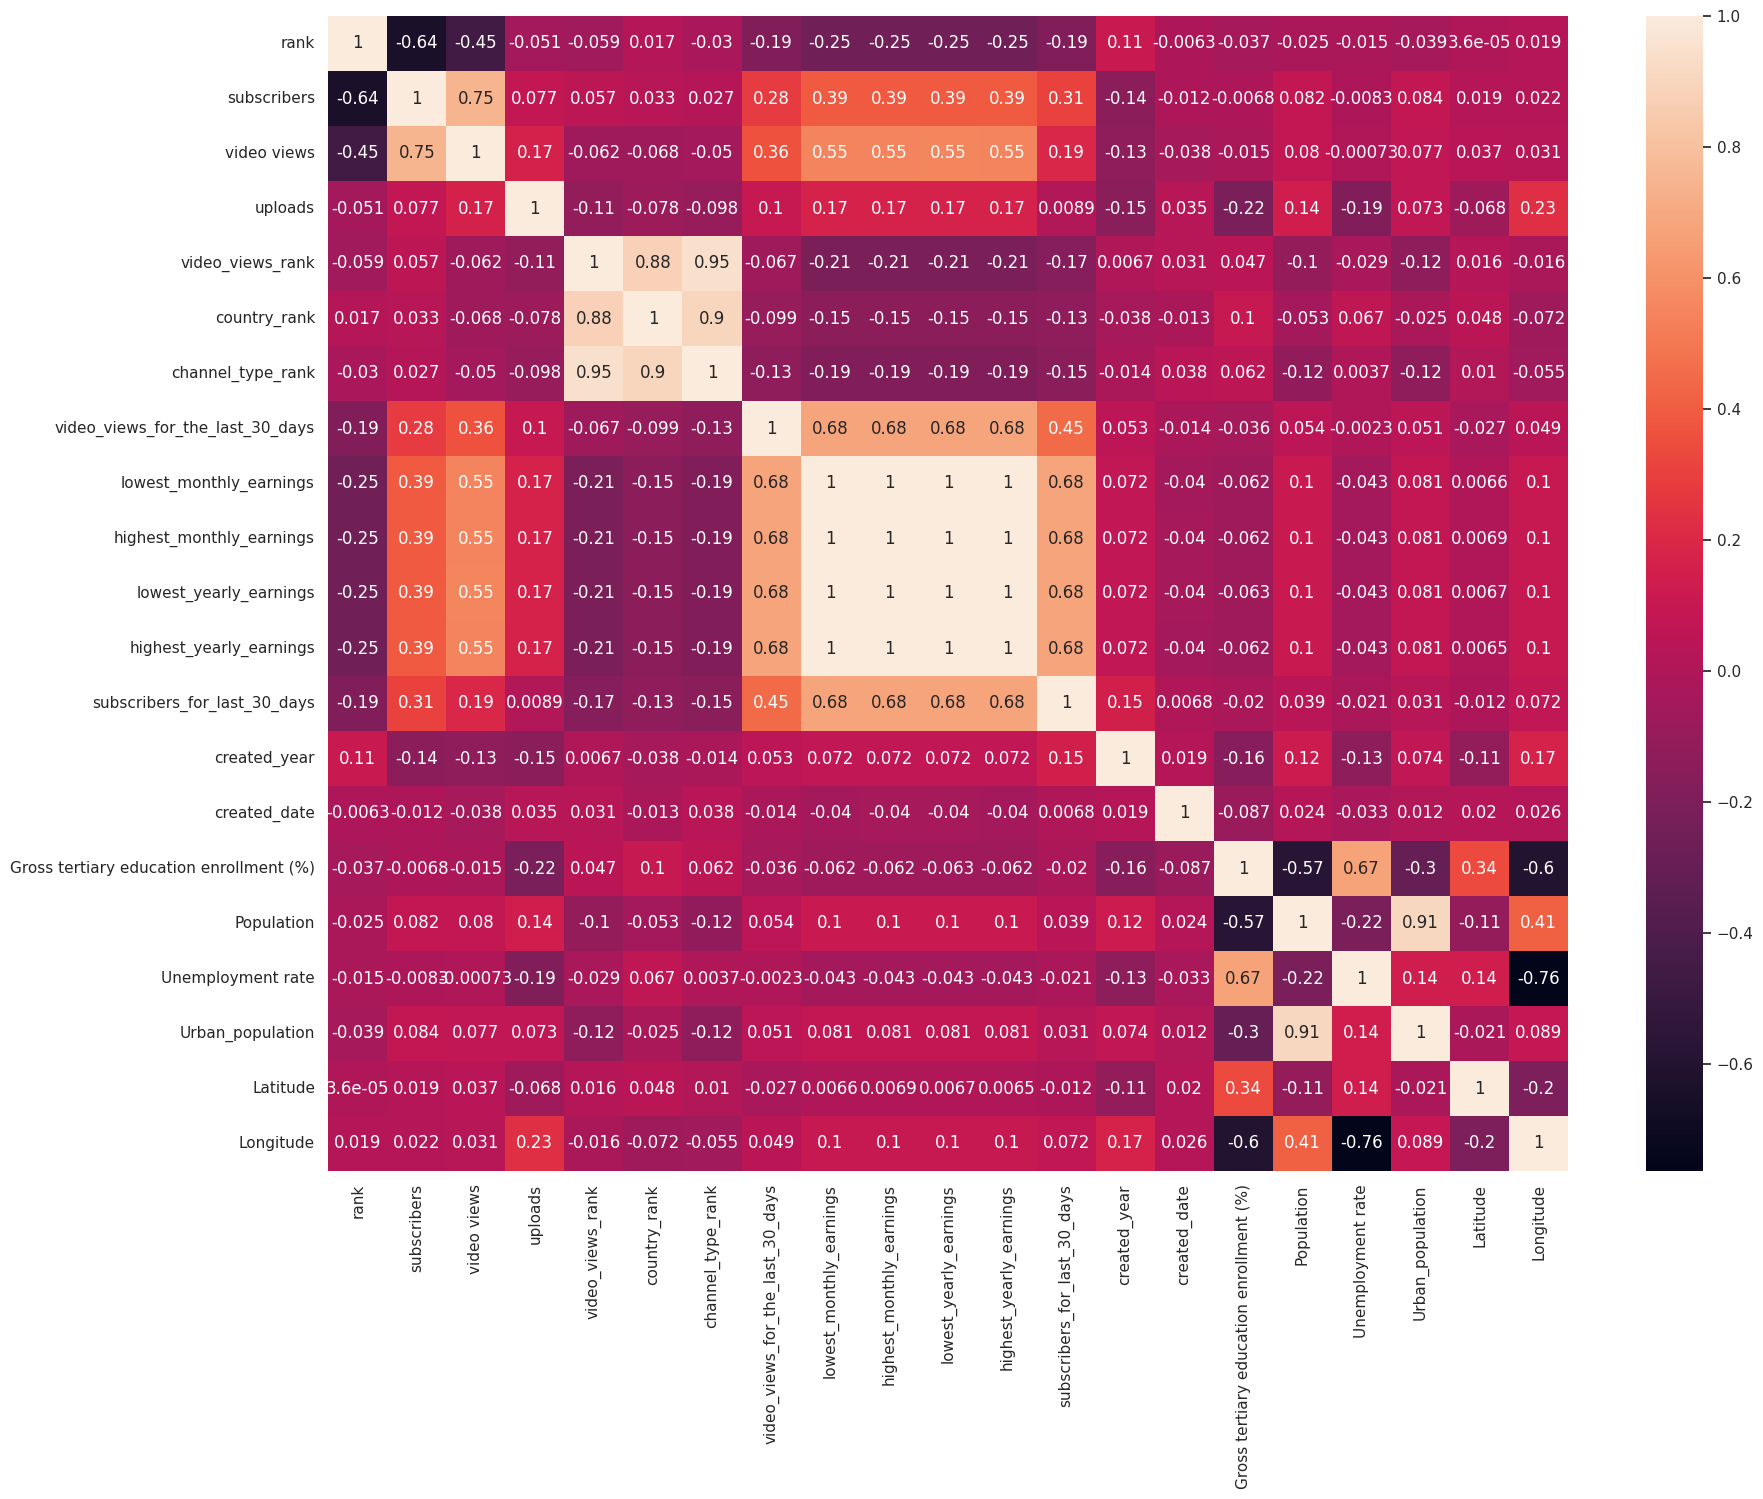

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(youtube_corr.corr(), annot=True)

Наблюдается высокая положительная корреляция между:
*   общим числом подписчиков и просмотров (0.75)
*   рейтингами каналов на основе общего количества просмотров, на основе количества подписчиков в его стране и рейтингом канала в зависимости от его типа
*   числом населения в стране и числом гордского населения в стране

Средняя корреляция (0.68) между всеми видами полученных выплат, и корреляция (0.55) между общим количеством просмотров на канале и выплатами; также средняя корреляция (0.67) между уровнем безработицы и процентом образованного населения









**Задание 2. Корреляционный анализ**

In [ ]:
regr_youtube = youtube[['subscribers', 'video views']]
regr_youtube

,subscribers,video views
0,245000000,2.280000e+11
1,170000000,0.000000e+00
2,166000000,2.836884e+10
3,162000000,1.640000e+11
4,159000000,1.480000e+11
...,...,...
990,12300000,9.029610e+09
991,12300000,1.674410e+09
992,12300000,2.214684e+09
993,12300000,3.741235e+08


In [ ]:
filtered_youtube = regr_youtube[regr_youtube['video views'] != 0]
filtered_youtube

,subscribers,video views
0,245000000,2.280000e+11
2,166000000,2.836884e+10
3,162000000,1.640000e+11
4,159000000,1.480000e+11
6,112000000,9.324704e+10
...,...,...
990,12300000,9.029610e+09
991,12300000,1.674410e+09
992,12300000,2.214684e+09
993,12300000,3.741235e+08


Расчет коэффициента корреляции Пирсона:

In [ ]:
coef_pearson = filtered_youtube['subscribers'].corr(filtered_youtube['video views'])
print(f'Коэффициент корреляции Пирсона между subscribers и video views равен {round(coef_pearson,4)}')

Коэффициент корреляции Пирсона между subscribers и video views равен 0.8243


То есть данные в столбцах имеют высокую положительную корреляцию

**Линейная регрессия**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = filtered_youtube[['video views']]
y = filtered_youtube['subscribers']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

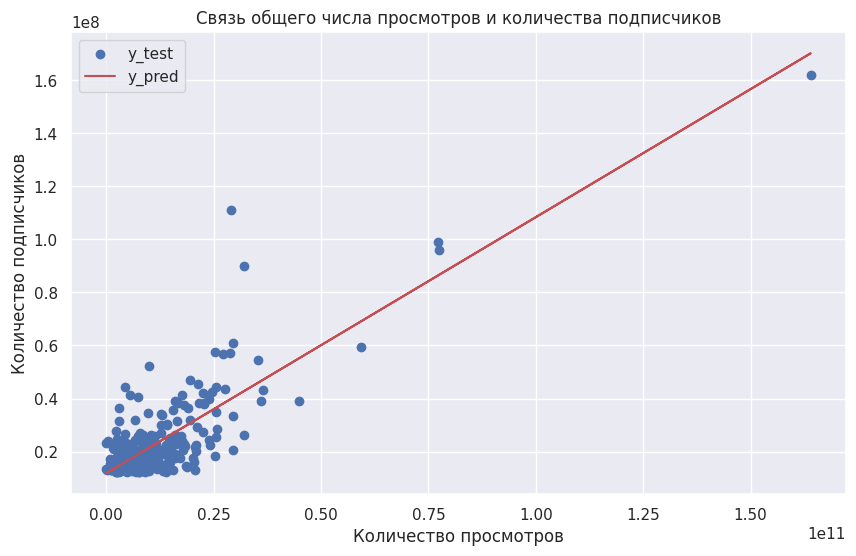

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title("Связь общего числа просмотров и количества подписчиков")
plt.ylabel("Количество подписчиков")
plt.xlabel("Количество просмотров")
plt.legend(['y_test', 'y_pred'])
plt.show()

In [ ]:
print(f'Полученное линейное уравнение: y = {round(model.coef_[0],3)}x + {round(model.intercept_,3)}')
print(f'Коэффициент детерминации R2 = {model.score(X_test, y_test)}')

Полученное линейное уравнение: y = 0.001x + 11820073.189
Коэффициент детерминации R2 = 0.6631544237913568


Коэффициент детерминации равен 0.66, что является показателем для приемлемой модели, т.е. линейная зависимость, хоть и неидеальная, но присутствует

Влияние нулевых просмотров на точность модели:

In [ ]:
X1 = regr_youtube[['video views']]
y1 = regr_youtube['subscribers']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

In [ ]:
print(f'Полученное линейное уравнение: y = {round(model1.coef_[0],3)}x + {round(model1.intercept_,3)}')
print(f'Коэффициент детерминации R2 = {model1.score(X1_test, y1_test)}')

Полученное линейное уравнение: y = 0.001x + 12749476.635
Коэффициент детерминации R2 = 0.3401071411772094


Хоть и количество нулевых просмотров относительно невелико (7), но точность модели линейной регрессии упала практически в 2 раза

**Задание 3. Классификация**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

Определение двух самых популярных категорий каналов

In [ ]:
top2_cat = youtube['category'].value_counts().head(2).index.tolist()
print(f'Самые популярные категории каналов: {top2_cat}')
filt_category = youtube[youtube['category'].isin(top2_cat)]

Самые популярные категории каналов: ['Entertainment', 'Music']


In [ ]:
filt_category = filt_category[filt_category['video views'] != 0]
filt_category

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
17,18,BANGTANTV,75600000,2.082699e+10,Music,BANGTANTV,2281,South Korea,KR,Music,...,400000.0,2012.0,Dec,17.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,977,SAAIHALILINTAR,12400000,1.113066e+09,Entertainment,SAAIHALILINTAR,409,Indonesia,ID,Entertainment,...,NaN,2012.0,Apr,28.0,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327
978,979,Heidi and Zidane HZHtube,12400000,4.021409e+09,Entertainment,Heidi and Zidane HZHtube,813,Canada,CA,Entertainment,...,NaN,2015.0,Nov,24.0,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771
982,983,DisneyChannelUK,12400000,1.260749e+10,Music,DisneyChannelUK,4422,United Kingdom,GB,Entertainment,...,NaN,2007.0,Dec,6.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,...,NaN,2005.0,Oct,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [ ]:
le = LabelEncoder()
youtube_class = le.fit_transform(filt_category['category'])
youtube_class

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
youtube_features = filt_category[['video views', 'subscribers', 'uploads']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(youtube_features, youtube_class, test_size=0.2, random_state=13)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
result = pd.DataFrame([y_test, y_pred])
result

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,1,1,1,1,1,1,1,1,0,0,...,0,1,1,0,0,0,0,1,0,1
1,1,0,1,0,0,1,1,1,1,0,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'accuracy= {accuracy}, precision= {precision}')

accuracy= 0.5955056179775281, precision= 0.5283018867924528


Точность модели получилась 59.5%, что является хоть и приемлемым значением, но и при этом не слишком высоким.